In [5]:
with open('./data/input_24.txt') as fh:
    file_input = fh.readlines()

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
%matplotlib inline

In [22]:
test = """....#
#..#.
#..##
..#..
#...."""
test = test.splitlines()

In [70]:
# lines = [[0 if c == '.' else 1 for c in line ] for line in file_input]
lines = [[0 if c == '.' else 1 for c in line ] for line in test]

In [121]:
field = np.array(lines)

In [122]:
window = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])

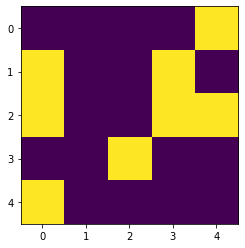

In [123]:
plt.imshow(field)

In [124]:
def _next(field):
    nnb = convolve2d(field, window, mode='same')
#     print(nnb)
    field = ((field == 1) & (nnb == 1)) | ((field == 0) & ((nnb == 1) | (nnb == 2)))
    return field.astype(np.int8)

def get_biodiversity(field):
    ff = field.flatten()
    return (2 ** np.arange(len(ff)) * ff).sum()

2129920


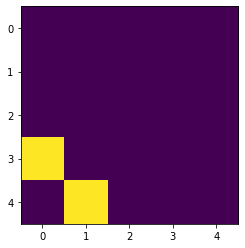

In [130]:
# test
field = np.array([[0 if c == '.' else 1 for c in line ] for line in test])
seen = set([get_biodiversity(field)])
while True:
    field = _next(field)
    bd = get_biodiversity(field)
    if bd in seen:
        plt.imshow(field)
        print(bd)
        break
    seen.add(bd)

27562081


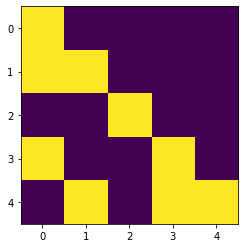

In [133]:
# part 1
field = np.array([[0 if c == '.' else 1 for c in line.strip() ] for line in file_input])
seen = set([get_biodiversity(field)])
while True:
    field = _next(field)
    bd = get_biodiversity(field)
    if bd in seen:
        plt.imshow(field)
        print(bd)
        break
    seen.add(bd)

In [136]:
# part 2

In [143]:
outer = np.zeros((5, 5))
outer[:, 0] = 1
outer[:, 4] = 1
outer[0, :] = 1
outer[4, :] = 1

inner = np.zeros((5, 5))
inner[1:-1, 1] = 1
inner[1:-1, 3] = 1
inner[1, 2] = 1
inner[3, 2] = 1
inner

array([[0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0.]])

In [175]:
# field = np.array([[0 if c == '.' else 1 for c in line.strip() ] for line in file_input])
field = np.array([[0 if c == '.' else 1 for c in line.strip() ] for line in test])


In [210]:
def add_outer_nbrs(field):
    ret = np.zeros((5, 5), dtype=np.int16)
    ret[:, 0] += field[2, 1]
    ret[0, :] += field[1, 2]
    ret[:, 4] += field[2, 3]
    ret[4, :] += field[3, 2]
#     print('add_outer', ret)
    return ret
    

def add_inner_nbrs(field):
    ret = np.zeros((5, 5), dtype=np.int16)
    ret[2, 1] += field[:, 0].sum()
    ret[1, 2] += field[0, :].sum()
    ret[2, 3] += field[:, 4].sum()
    ret[3, 2] += field[4, :].sum()
#     print('add_inner', ret)
    return ret

def next_field(field, nnb):
    field = ((field == 1) & (nnb == 1)) | ((field == 0) & ((nnb == 1) | (nnb == 2)))
    field[2, 2] = 0
    return field.astype(np.int8)

In [229]:
%%timeit
# field = np.array([[0 if c == '.' else 1 for c in line.strip() ] for line in test])
field = np.array([[0 if c == '.' else 1 for c in line.strip() ] for line in file_input])

fields = [field]
n = 0
shift=0
while n < 200:
    n += 1
#     print(n)
    if convolve2d(fields[0], outer, mode='valid'):
        fields.insert(0, np.zeros((5, 5), dtype=np.int16))
        shift += 1
    if convolve2d(fields[-1], inner, mode='valid'):
        fields.append(np.zeros((5, 5), dtype=np.int16))
    N = len(fields)
    nnbs = [convolve2d(field, window, mode='same').astype(np.int16) for field in fields]

    for i in range(N):
        if i > 0:
            nnbs[i] += add_outer_nbrs(fields[i-1])
        if i < (N-1):
            nnbs[i] += add_inner_nbrs(fields[i+1])
    for i in range(N):
        fields[i] = next_field(fields[i], nnbs[i])

1.99 s ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [222]:
len(fields)

201

In [223]:
sum([f.sum() for f in fields])

1893

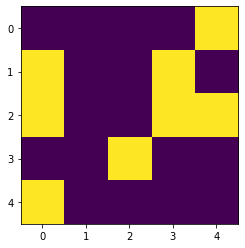

In [215]:
plt.imshow(field)

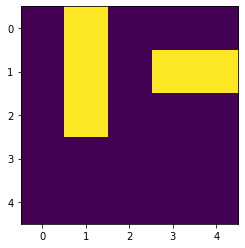

In [217]:
plt.imshow(fields[shift])